## Test numpy & matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

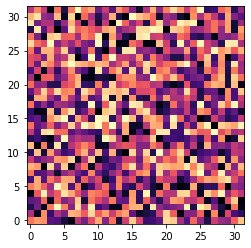

In [2]:
plt.imshow( np.random.rand( 32, 32 ), origin='lower', cmap=plt.get_cmap('magma') );

## Test MPI

In [3]:
import numpy as np
import ipcmagic
import ipyparallel as ipp

In [4]:
%ipcluster start -n 4 --mpi

IPCluster is ready! (6 seconds)


In [5]:
c = ipp.Client()

In [6]:
c.ids

[0, 1, 2, 3]

In [7]:
%%px
import socket
from mpi4py import MPI

In [8]:
%%px
print("Hello World from rank %s of %s on nid %s" % (MPI.COMM_WORLD.rank,
                                                    MPI.COMM_WORLD.size,
                                                    socket.gethostname()))

[stdout:0] Hello World from rank 2 of 4 on nid nid06285
[stdout:1] Hello World from rank 0 of 4 on nid nid06285
[stdout:2] Hello World from rank 3 of 4 on nid nid06285
[stdout:3] Hello World from rank 1 of 4 on nid nid06285


In [9]:
%ipcluster stop

## Test Cupy

In [10]:
import numpy as np
import cupy as cp
import time

In [11]:
### Numpy and CPU
s = time.time()
x_cpu = np.ones((1000,1000,1000))
e = time.time()
print(e - s)

### CuPy and GPU
s = time.time()
x_gpu = cp.ones((1000,1000,1000))
cp.cuda.Stream.null.synchronize()
e = time.time()
print(e - s)

2.771012306213379
0.43631553649902344


## Test GT4Py

In [12]:
import gt4py
from gt4py import gtscript

In [13]:
@gtscript.stencil(backend="numpy")
def copy_stencil(in_field: gtscript.Field[float], out_field: gtscript.Field[float]):
    from __gtscript__ import computation, interval, PARALLEL

    with computation(PARALLEL), interval(...):
        out_field = in_field

In [14]:
shape = (2,4,4)
in_storage = gt4py.storage.ones(shape=shape, default_origin=(0,0,0), dtype=float, backend="numpy")
out_storage = gt4py.storage.zeros(shape=shape, default_origin=(0,0,0), dtype=float, backend="numpy")
copy_stencil(in_storage, out_storage)
print(out_storage)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


## Check installed packages

In [15]:
import pip

pip.main(['list'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Package                   Version
------------------------- ----------
aenum                     3.1.0
aiohttp                   3.5.4
alembic                   1.0.11
appdirs                   1.4.4
asn1crypto                0.24.0
astunparse                1.6.3
async-generator           1.10
async-timeout             3.0.1
attrs                     20.3.0
backcall                  0.2.0
bash-kernel               0.7.2
batchspawner              0.9.0.dev0
black                     21.5b2
bleach                    3.1.0
bokeh                     1.3.4
boltons                   21.0.0
bqplot                    0.11.6
cached-property           1.5.2
certifi                   2021.5.30
certipy                   0.1.3
cffi                      1.12.3
chardet                   4.0.0
click                     7.1.2
cloudpickle               1.2.1
cmake                     3.20.2
colorcet                  2.0.2
cryptography              2.7
cupy-cuda102              9.1.0
cycler             

You should consider upgrading via the '/users/class200/HPC4WC_venv/bin/python -m pip install --upgrade pip' command.


0